# Lab03 - Clustering

## Yêu cầu bài tập

**Cách làm bài**


- Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm. **Không được sửa những chỗ không có** `TODO`.

- Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

- Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

- Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`) và ấn Ctrl+S để lưu lại.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [18]:
def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    d = x - y.reshape(x.shape)
    return np.sum(d*d)
 

In [19]:
class k_means:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.centroids=X[indexes]
            
        
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            d=euclidianDistance(cur_centroid, prev_centroid)
            
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    c = np.argmin(d_list, axis = 0)

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                
                #TODO (new_centroid=???)
                new_centroid = np.mean(samples,axis=0)
                
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(data[i],self.centroids[j]))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            pred.append(np.argmin(d_list,axis=0))
            
        return np.array(pred)

## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [20]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**Hiển thị dữ liệu trên đồ thị**

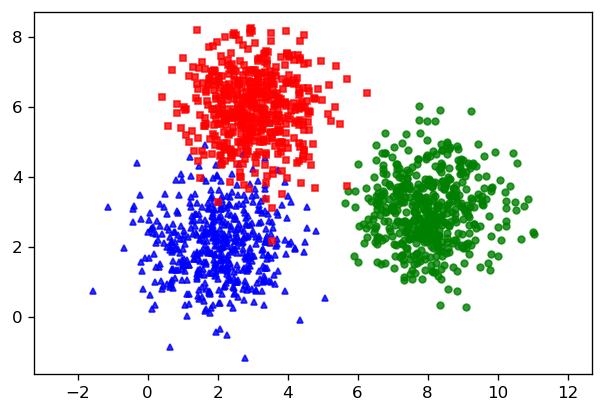

In [21]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.02108413 2.05070446]
 [8.02344787 3.061206  ]
 [3.01913575 5.99325305]]


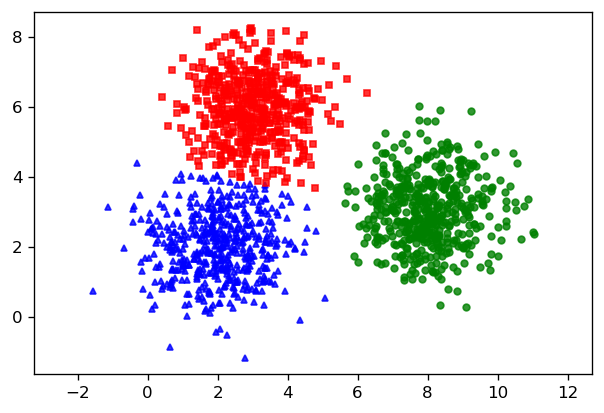

In [22]:
model1=k_means(k=K)
print('Centers found by your model:')
print(model1.fit(X))
pred=model1.predict(X)
visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


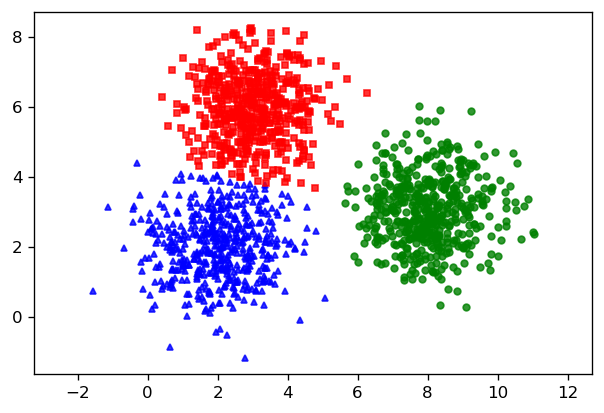

In [23]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medois tương tự như phần 1

In [24]:
#K-medois Implementation
class k_medoids:
    def __init__ (self,k=2,thresold = 0.00001, max_iter = 300,has_converged=False):
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold. Threshold approximates 0
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,3)
        self.centroids=X[indexes]
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            d=euclidianDistance(cur_centroid, prev_centroid)
            
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
    
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    c = np.argmin(d_list, axis = 0)

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by point have minimun total distance from it to orthers
                #TODO (new_centroid=???)
                min_dist = float("inf")
                for point_f in samples:
                    total_distance=0
                    for point_t in samples:
                        total_distance = total_distance + euclidianDistance(point_f, point_t)
                    if (min_dist>total_distance):
                        min_dist= total_distance
                        new_centroid = point_f
                
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)
    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(data[i],self.centroids[j]))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            pred.append(np.argmin(d_list,axis=0))
            
        return np.array(pred)

#### Gom nhóm dữ liệu bằng thuật toán k-medoids mà bạn vừa cài đặt (phần này không có TODO, nhưng dùng một cell riêng để dễ quan sát)

Centers found by your model:
[[7.98063868 3.0952637 ]
 [2.98493437 5.97312308]
 [1.98413249 2.04159709]]


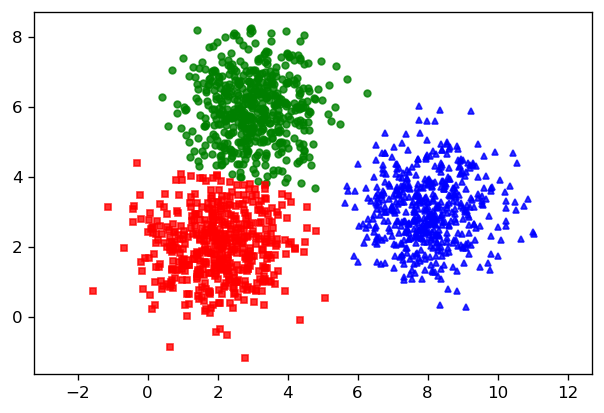

In [25]:
model3=k_medoids(k=3)
print('Centers found by your model:')
print(model3.fit(X))

pred=model3.predict(X)

visualize(X,pred)

#### Thử lại kết quả với scikit learn (phần này không có TODO, nhưng dùng một cell riêng để dễ quan sát)

Centers found by scikit-learn:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


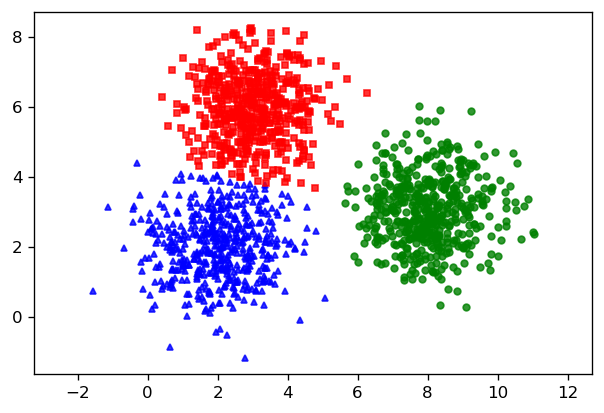

In [26]:
from sklearn_extra.cluster import KMedoids
model4 = KMedoids(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model4.cluster_centers_)
pred_label = model4.predict(X)
visualize(X, pred_label)

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

TODO: 
Sự khác nhau cơ bản nhất của 2 thuật toán đó là điểm trung tâm của mỗi clusters. Ở thuật toán Kmeans thì điểm trung tâm là một điểm có thể không tồn tại trong bộ dữ liệu train hay test hay nói cách khác nó được tính bằng trung bình của các điểm trong vùng. Ở thuật toán KMedoids thì điểm trung tâm là một điệm xác định thuộc tập train hay test phụ thuộc vào tổng khoảng cách từ điểm đó đến các điểm còn lại có là nhỏ nhất hay không?


### Bổ sung: Phân tích điểm mạnh yếu của 2 thuật toán K-means và K-medoids

#### Điểm mạnh:
##### Kmeans:
+ Hiệu quả với dữ liệu lớn và rộng, độ phức tạp O(t*n*k)
++ n là số điểm trong không gian dữ liệu
++ k là số cụm phân hoạch
++ t là số lần lặp
+ Dễ hiểu và cài đặt

##### Kmedoids: 
+ Xử lý được dữ liệu nhiễu và mẫu cá biệt


#### Điểm yếu:
##### Kmeans:
+ Chỉ thực hiện được khi chọn được số lượng cụm
+ Cụ thể số cụm k
+ Khó phát hiện các loại cụm có hình dang phức tạp và nhất là các dạng cụm không lồi
+ Không thể làm được với dữ liệu nhiễu và mẫu cá biệt
+ Chỉ có thể áp dụng khi tính được trọng tâm

##### Kmediods:
+ Tốn chi phí, độ phức tạp O(k*(n-k)^2*t),trong đó:
+ Kém hiệu quả
+ Chọn được số cum k trước
+ Kết quả và thời gian chạy phụ thuộc và phân hoạch ban đầu




# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [27]:
from sklearn import datasets
iris = datasets.load_iris()

In [28]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

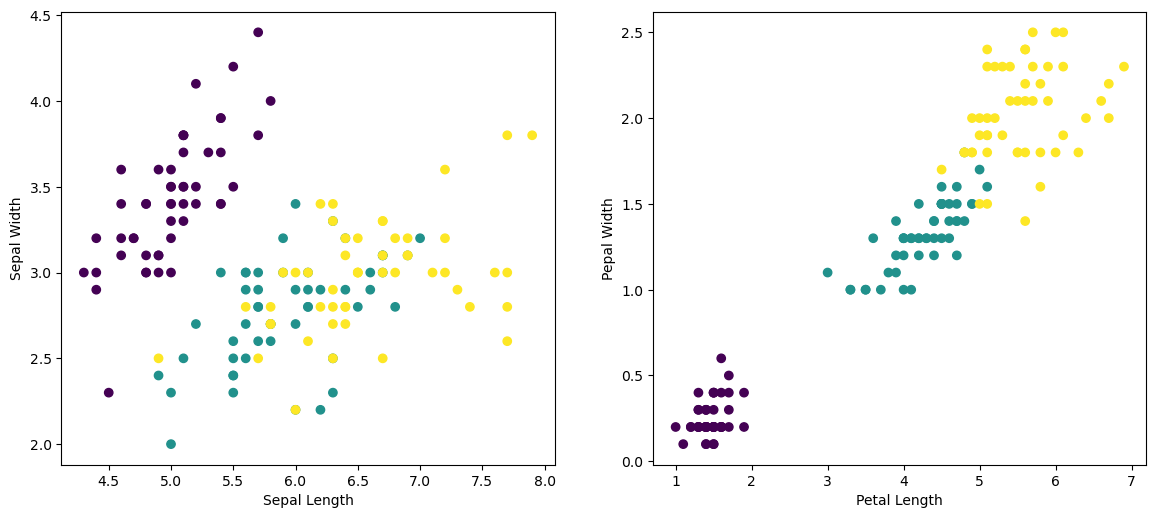

In [29]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

TODO:Nhìn vào 2 sơ đồ thì điều đầu tiên ta nhận thấy được, ta có thể gom cụm các loại hoa lan thông qua đặc tính của cánh hoa.Vì:
+ Nhận xét phần trực quan hóa về đặc trưng của đài hoa thì ta có thể thấy được chỉ có một loại hoa được gom cụm dễ dàng còn 2 loại còn lại có đặc tính đài hoa có nhiều nét tương đồng.
+ Nhận xét phần trực quá hóa về đặc trưng của cánh hoa thì ta có thể thấy 3 loại hoa đề có những đặc trưng về cánh hoa khá rõ rệt, có thể áp dụng được thuật toán gom cụm với độ đo dựa vào đặc tính cánh hoa.

In [30]:
D=X[:,2:]
model=k_means(k=3)
centers = model.fit(D)
print(centers)

[[5.51481481 1.99444444]
 [4.19130435 1.30217391]
 [1.462      0.246     ]]


Text(0.5, 1.0, 'Predicted')

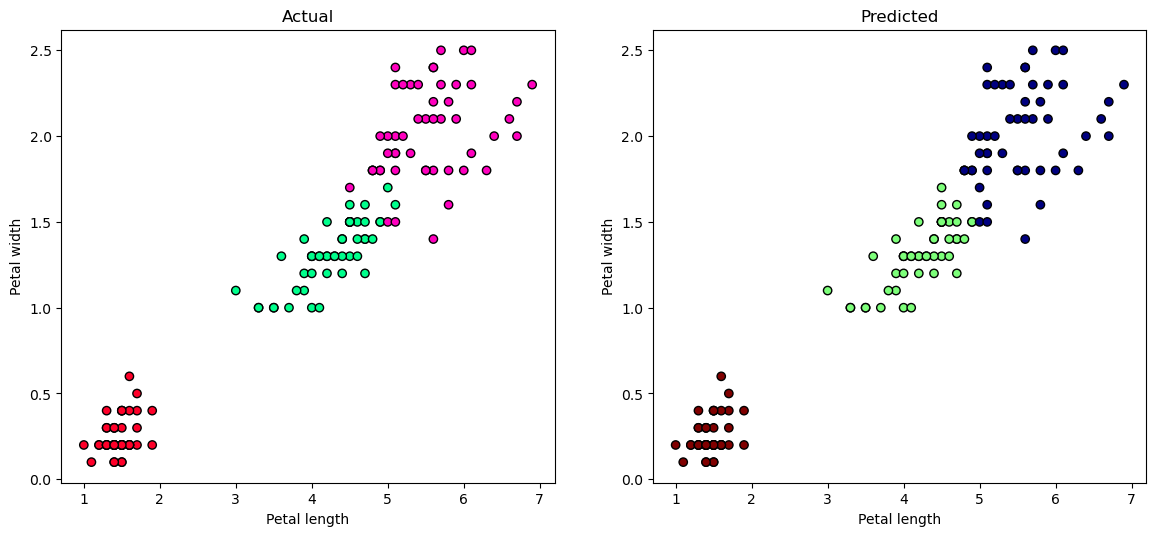

In [31]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:Phương pháp Kmeans dữ đoán không chính xác phần dữ liệu nhiễu (cụ thể 6 điểm)



### Thực hiện tương tự với thuật toán K-medois

(*) Ngoài TODO em sẽ chia cell theo trình bày bên trên đễ dễ quan sát

In [32]:
#TODO
D_1=X[:,2:]
model_2=k_medoids(k=3)
centers_2 = model_2.fit(D)
print(centers)

[[5.51481481 1.99444444]
 [4.19130435 1.30217391]
 [1.462      0.246     ]]


Text(0.5, 1.0, 'Predicted')

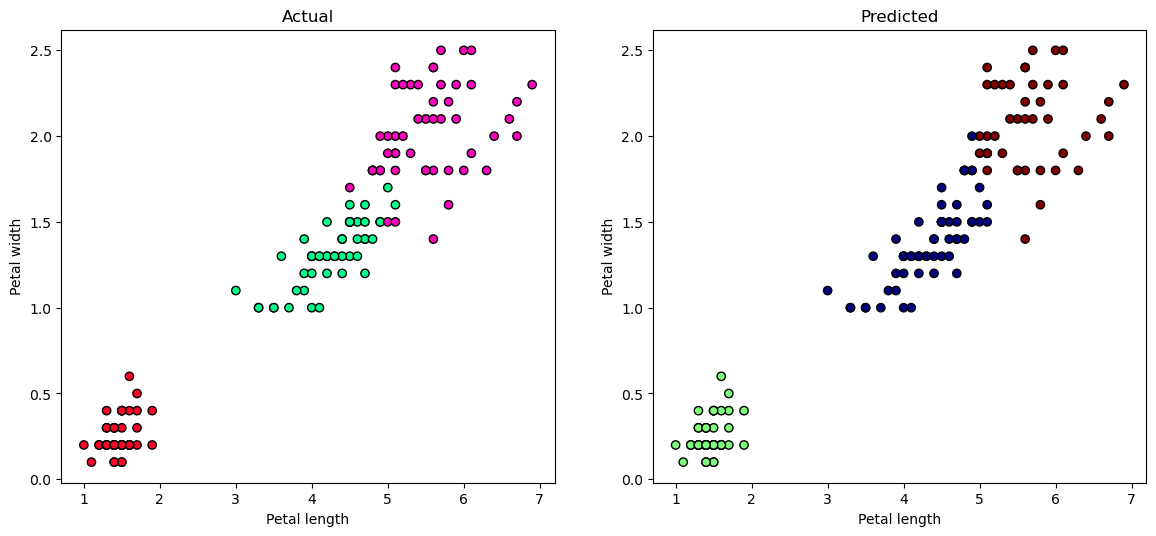

In [33]:
new_labels_2 = model_2.predict(D_1)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D_1[:, 0], D_1[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D_1[:, 0], D_1[:, 1], c=new_labels_2, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')